# Task 6

# Description:

# The project involved selecting a dataset of interest and performing a comprehensive analysis to extract meaningful insights. The project required applying a full data science workflow, including data cleaning, exploratory data analysis (EDA), question formulation, and data visualization.

# Import necessary libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
df = pd.read_csv('C:\\Users\\Asus\\Downloads\\disney_plus_titles.csv')

# 1. Data Cleaning

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64


In [55]:
# Replace missing values without using inplace=True
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [14]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

# 2. Exploratory Data Analysis (EDA)


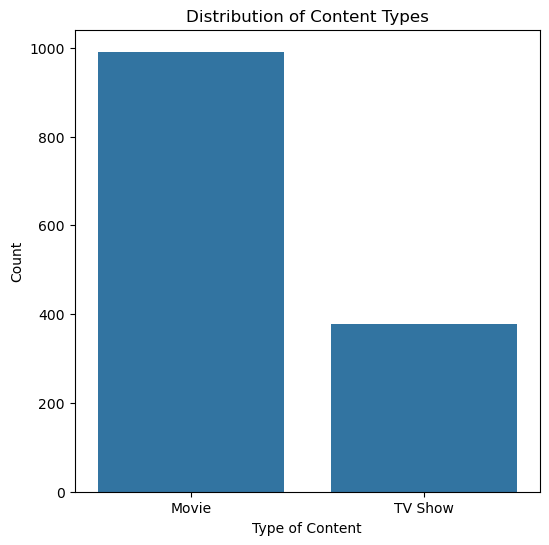

In [17]:
# Check the distribution of content types (Movies vs TV Shows)
plt.figure(figsize=(6, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Types')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()

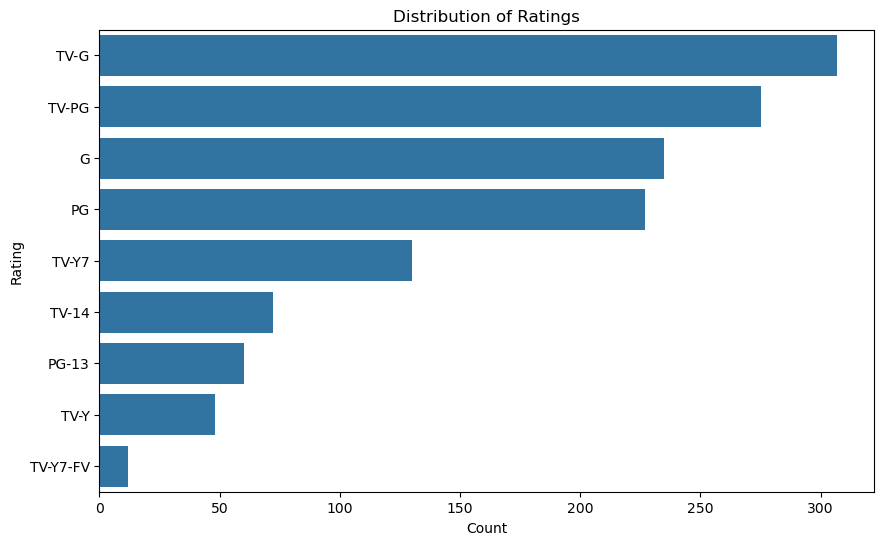

In [19]:
# Check the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.ylabel('Rating')
plt.xlabel('Count')
plt.show()

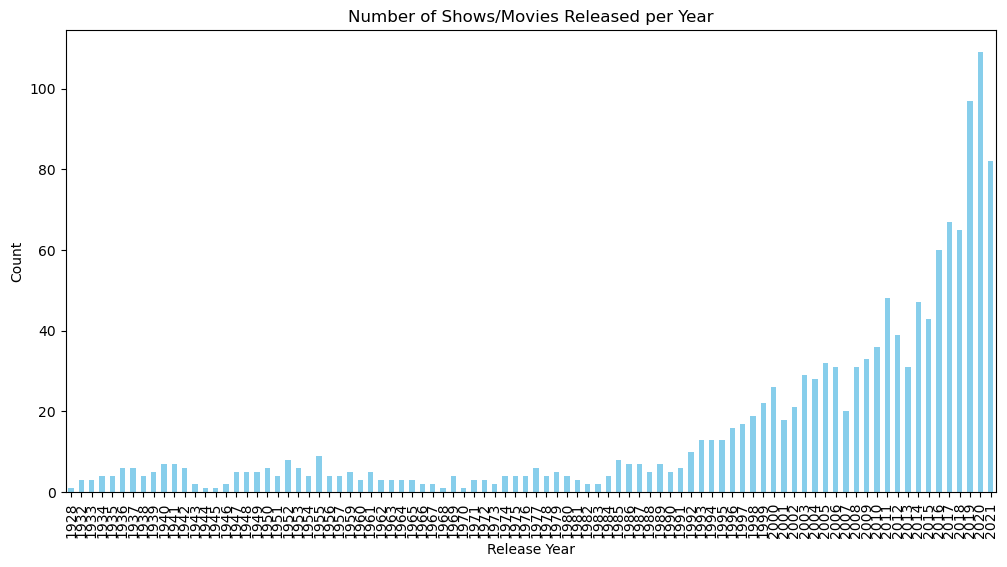

In [21]:
# Distribution of movies/TV shows by release year
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Shows/Movies Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# 3. Question Formulation and Solution

In [24]:
# Question 1: How many shows/movies were released each year?
release_count = df['release_year'].value_counts().sort_index()
print("Shows/Movies released each year:\n", release_count)

Shows/Movies released each year:
 release_year
1928      1
1932      3
1933      3
1934      4
1935      4
       ... 
2017     67
2018     65
2019     97
2020    109
2021     82
Name: count, Length: 90, dtype: int64


In [26]:
# Question 2: What are the most common genres?
genre_count = df['listed_in'].value_counts().head(10)
print("Most common genres:\n", genre_count)

Most common genres:
 listed_in
Animation, Comedy, Family                120
Action-Adventure, Animation, Comedy       75
Action-Adventure, Animation, Kids         45
Animals & Nature, Documentary, Family     40
Action-Adventure, Animation, Family       40
Animals & Nature, Docuseries, Family      38
Animals & Nature, Documentary             34
Action-Adventure, Comedy, Family          27
Animation, Family, Fantasy                26
Documentary                               24
Name: count, dtype: int64


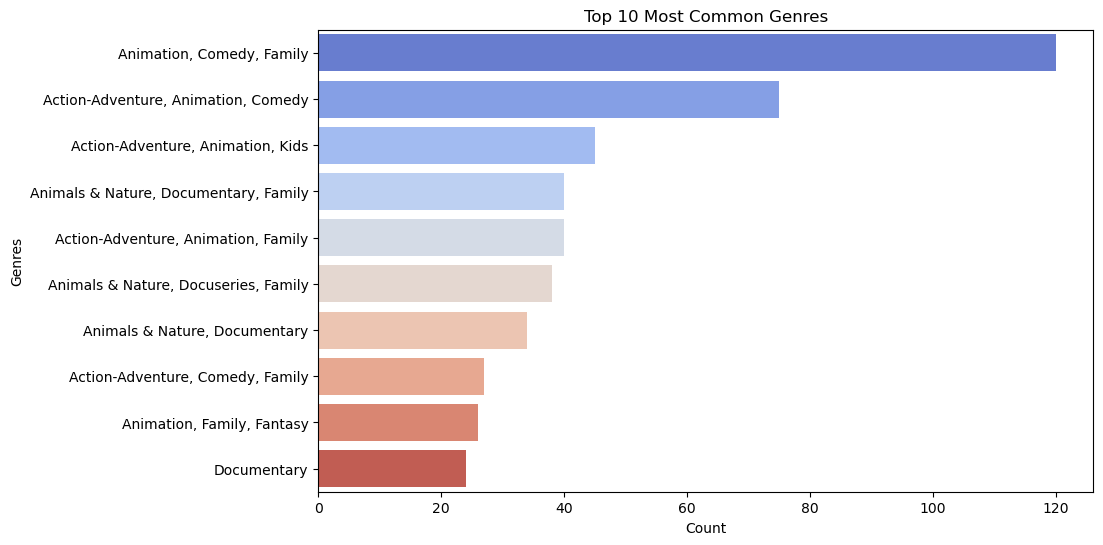

In [53]:
# Visualization of most common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_count.values, y=genre_count.index, hue=genre_count.index, palette='coolwarm', dodge=False)
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.legend([],[], frameon=False)  # Remove the legend since it is not needed
plt.show()


In [34]:
# Question 3: How does the duration vary between Movies and TV Shows?
# Convert duration to numeric values for Movies (ignoring TV shows with 'Seasons')
df['numeric_duration'] = df['duration'].str.extract(r'(\d+)').astype(float)

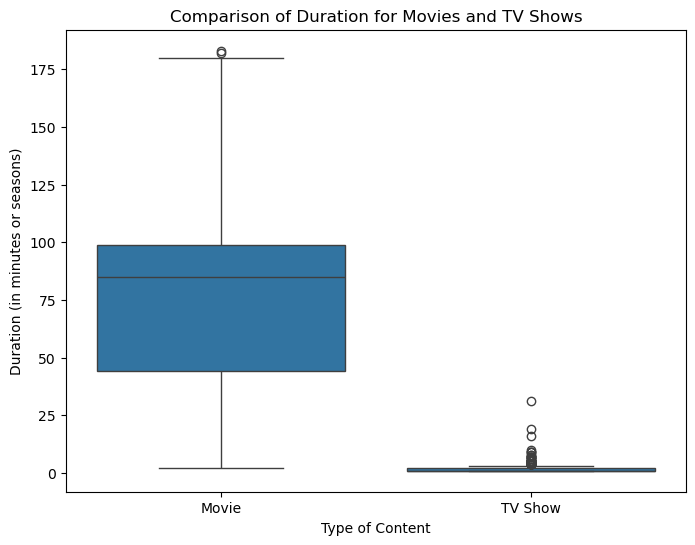

In [36]:
# Boxplot to compare duration of Movies vs TV Shows
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='numeric_duration', data=df)
plt.title('Comparison of Duration for Movies and TV Shows')
plt.xlabel('Type of Content')
plt.ylabel('Duration (in minutes or seasons)')
plt.show()

In [38]:
# Question 4: Which countries produce the most content on Disney Plus?
country_count = df['country'].value_counts().head(10)
print("Top 10 countries producing content:\n", country_count)

Top 10 countries producing content:
 country
United States                    976
Unknown                          175
United States, Canada             28
United Kingdom                    23
United States, United Kingdom     19
Canada, United States             17
United Kingdom, United States     14
United States, Australia           7
Canada                             5
United States, France              4
Name: count, dtype: int64


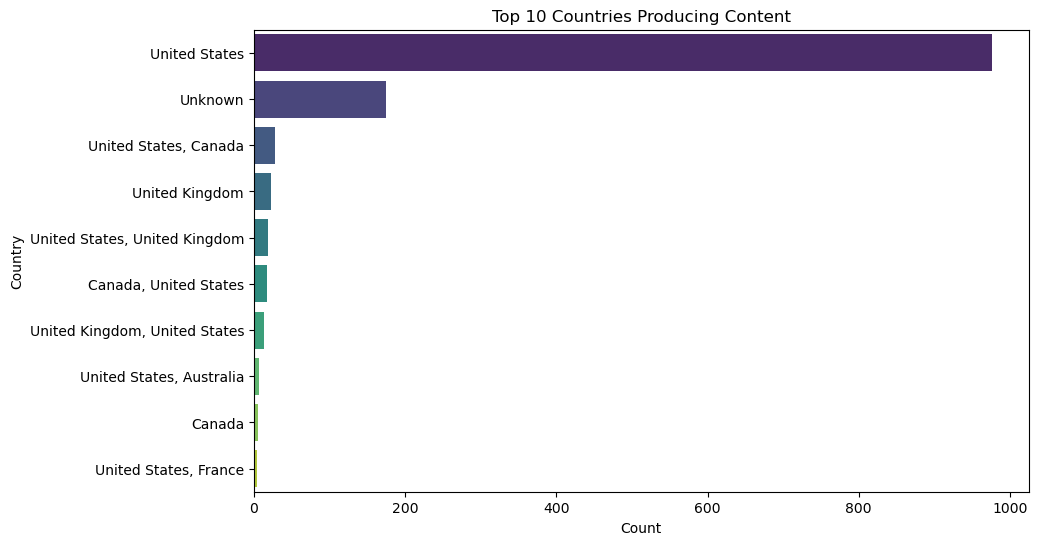

In [42]:
# Corrected code for barplot of top countries producing content

# Visualization of top countries producing content
plt.figure(figsize=(10, 6))
sns.barplot(x=country_count.values, y=country_count.index, hue=country_count.index, palette='viridis', dodge=False)
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend([],[], frameon=False)  # To remove the legend
plt.show()


# 4. Data Visualization

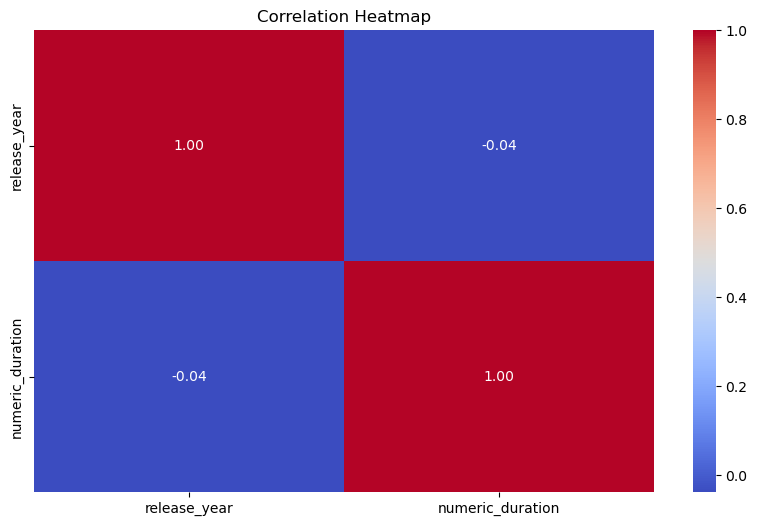

In [47]:
# Select only the numeric columns from the dataset
numeric_df = df.select_dtypes(include=[float, int])

# Check if the numeric DataFrame is empty (contains numeric data)
if not numeric_df.empty:
    # Correlation heatmap for numeric columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numeric data available for correlation.")


In [51]:
# Save the cleaned dataset 
df.to_csv('cleaned_disney_plus_titles.csv', index=False)